# 911 Calls 

## For this capstone project I will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)



##### Data and Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [5]:
df = pd.read_csv('911.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 4.9+ MB


# Let's find out which 5 places with the given zipcode were the most 911 calls

In [7]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [8]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# Which 5 Township had the most 911 calls?

In [9]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

# What is the number of unique calls

In [10]:
df['title'].nunique()

110

## Creating new features

In [11]:
x = df['title'].iloc[0]
x.split(':')[0]
df['Reason']= df['title'].apply(lambda title: title.split(':')[0])
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
5            EMS
6            EMS
7            EMS
8            EMS
9        Traffic
10       Traffic
11       Traffic
12       Traffic
13       Traffic
14       Traffic
15       Traffic
16           EMS
17           EMS
18           EMS
19       Traffic
20       Traffic
21       Traffic
22          Fire
23       Traffic
24       Traffic
25           EMS
26           EMS
27          Fire
28       Traffic
29       Traffic
          ...   
99462        EMS
99463        EMS
99464        EMS
99465        EMS
99466        EMS
99467        EMS
99468       Fire
99469       Fire
99470        EMS
99471        EMS
99472        EMS
99473        EMS
99474        EMS
99475    Traffic
99476        EMS
99477        EMS
99478    Traffic
99479        EMS
99480        EMS
99481        EMS
99482    Traffic
99483        EMS
99484       Fire
99485    Traffic
99486    Traffic
99487    Traffic
99488    Traffic
99489        E

# Let's count how many of the phone calls were caused by what reason

In [12]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

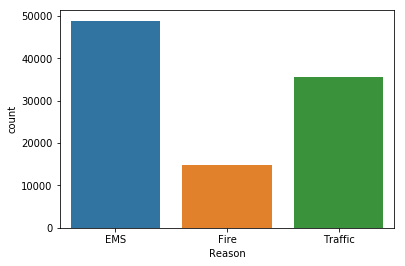

In [13]:
sns.countplot(x='Reason',data=df)

# Let's change the timeStamp to add new columns to be able to analyze data on a given day in a given month or at a specific time

In [14]:
type(df['timeStamp'].iloc[0])

str

In [15]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [16]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [17]:
df['Hour'] = df['timeStamp'].apply(lambda time:time.hour)
df['Month'] = df['timeStamp'].apply(lambda time:time.month)
df['Day of week'] = df['timeStamp'].apply(lambda time:time.dayofweek)

In [18]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [19]:
df['Day of week'] = df['Day of week'].map(dmap)

In [20]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


# And now we can plot, how many times the given reasons for telephone calls have occurred

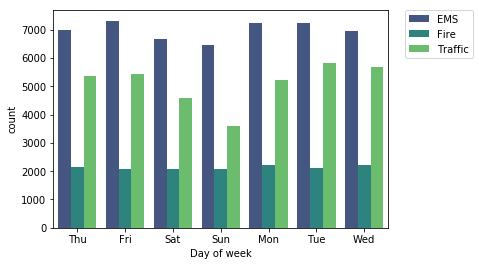

In [21]:
sns.countplot(x='Day of week',data=df,hue='Reason',palette='viridis')
#To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

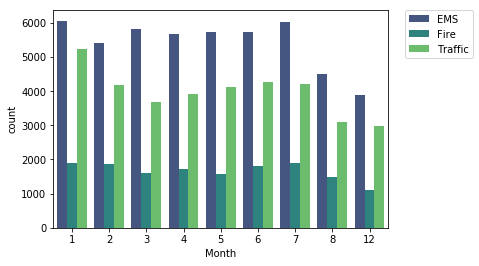

In [22]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
#To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [23]:
byMonth = df.groupby('Month').count()

In [24]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


# at 9, 10 and 11 months we do not have any data so using the byMonth['lat']. plot () we can specify the trend between 8 and 12 months

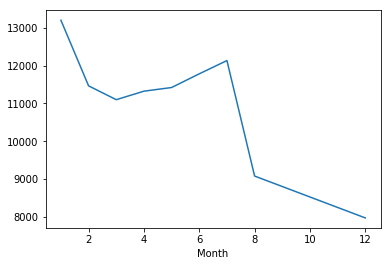

In [25]:
byMonth['lat'].plot()

# Ploting a simple linear relationship

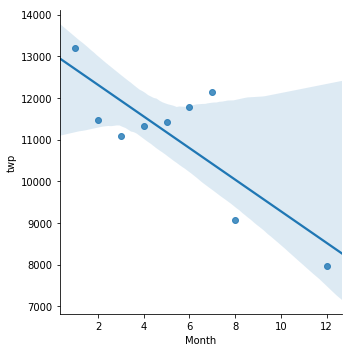

In [26]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

# Let's add columns with date using timeStamp

In [27]:
t = df['timeStamp'].iloc[0]

In [28]:
t

Timestamp('2015-12-10 17:40:00')

In [29]:
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

In [30]:
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
5        2015-12-10
6        2015-12-10
7        2015-12-10
8        2015-12-10
9        2015-12-10
10       2015-12-10
11       2015-12-10
12       2015-12-10
13       2015-12-10
14       2015-12-10
15       2015-12-10
16       2015-12-10
17       2015-12-10
18       2015-12-10
19       2015-12-10
20       2015-12-10
21       2015-12-10
22       2015-12-10
23       2015-12-10
24       2015-12-10
25       2015-12-10
26       2015-12-10
27       2015-12-10
28       2015-12-10
29       2015-12-10
            ...    
99462    2016-08-24
99463    2016-08-24
99464    2016-08-24
99465    2016-08-24
99466    2016-08-24
99467    2016-08-24
99468    2016-08-24
99469    2016-08-24
99470    2016-08-24
99471    2016-08-24
99472    2016-08-24
99473    2016-08-24
99474    2016-08-24
99475    2016-08-24
99476    2016-08-24
99477    2016-08-24
99478    2016-08-24
99479    2016-08-24
99480    2016-08-24


# let's plot charts indicating the number of reasons for 911 calls for a specific date

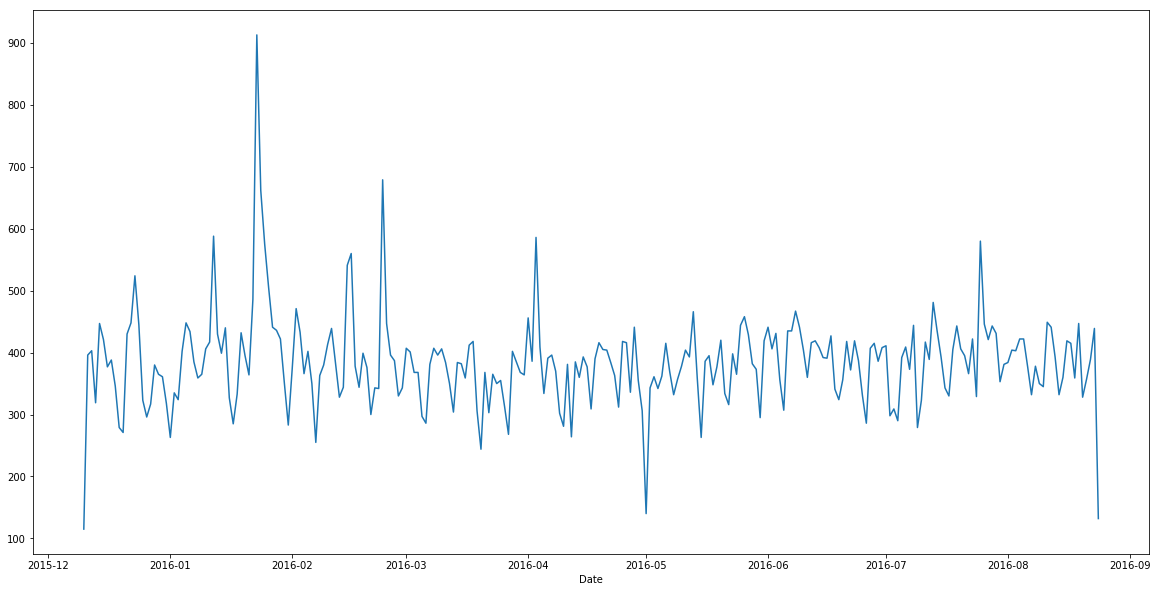

In [31]:
date = df.groupby('Date').count()['lat'].plot(figsize=(20,10))


Text(0.5, 1.0, 'Traffic')

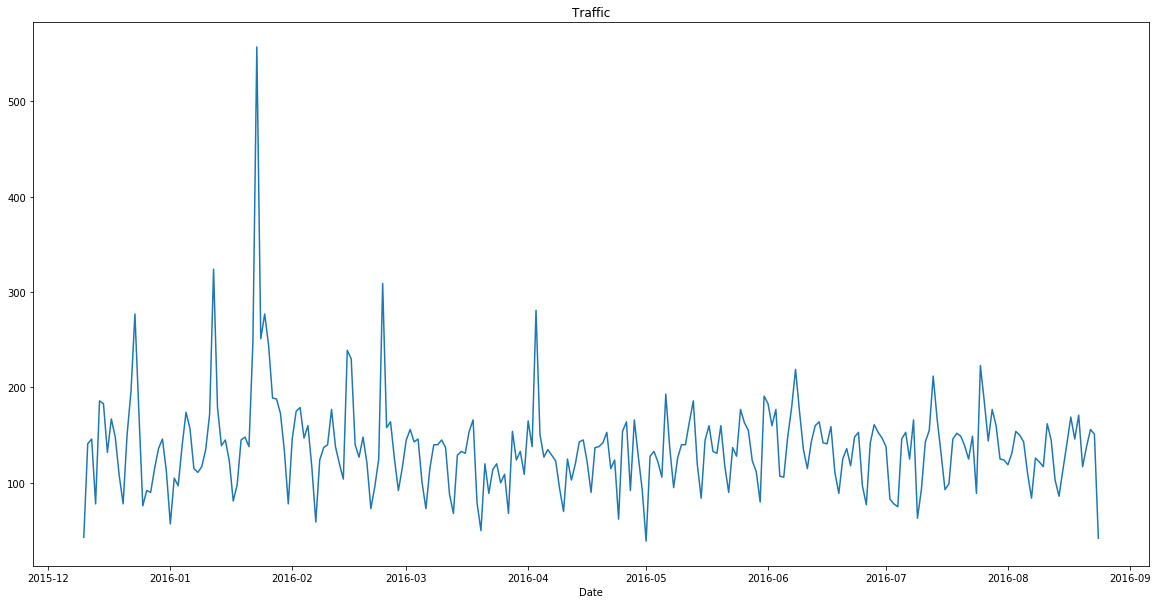

In [32]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot(figsize=(20,10))
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

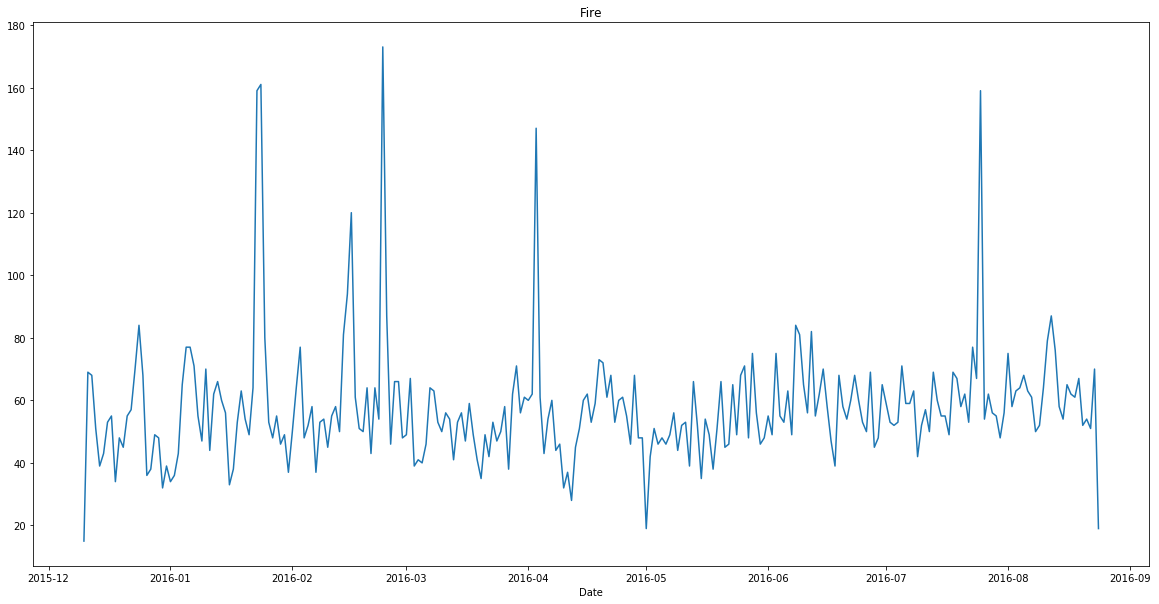

In [33]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['lat'].plot(figsize=(20,10))
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

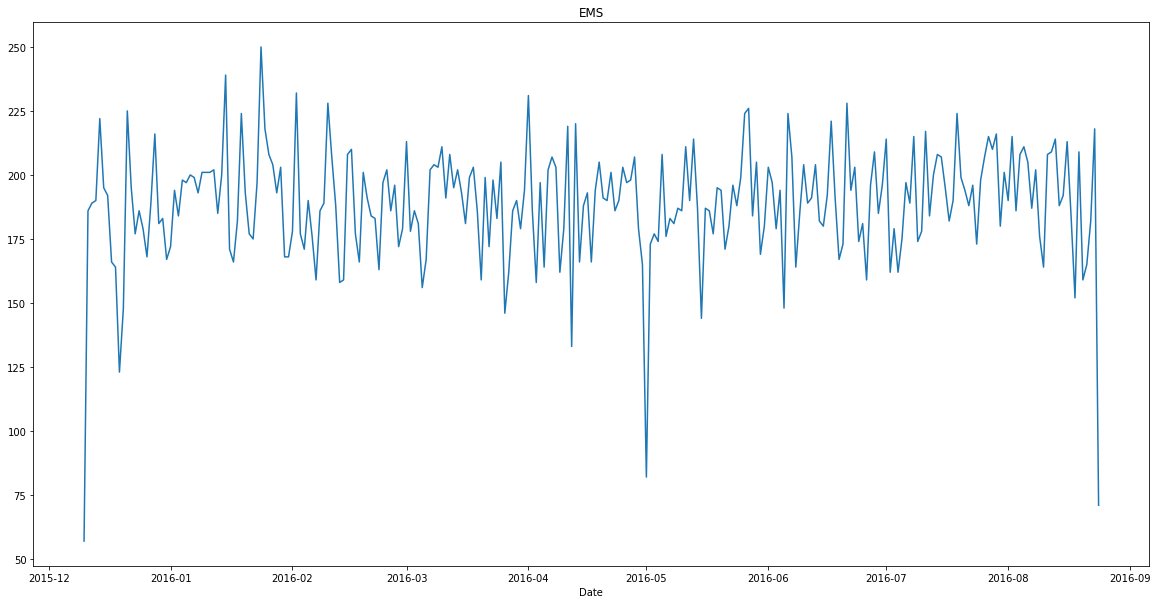

In [34]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['lat'].plot(figsize=(20,10))
plt.title('EMS')

In [35]:
dayHour = df.groupby(['Day of week','Hour']).count()['Reason'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


# Let's plot heat map of counted 911 calls in specyfic day of a week and hour of that day 

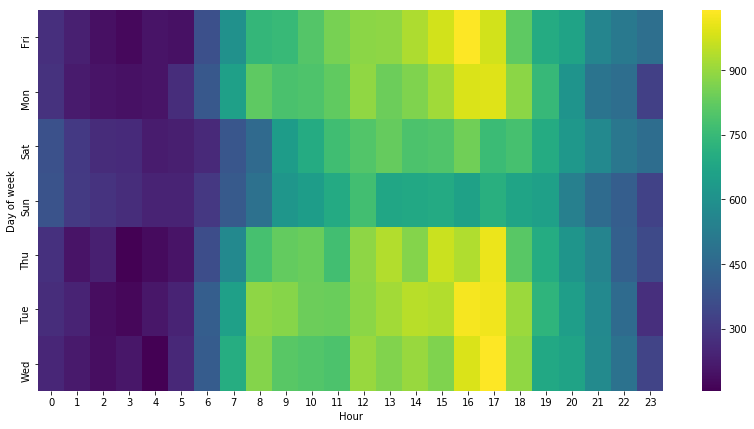

In [36]:
plt.figure(figsize=(14,7))
sns.heatmap(data=dayHour,cmap='viridis')

<Figure size 1008x504 with 0 Axes>

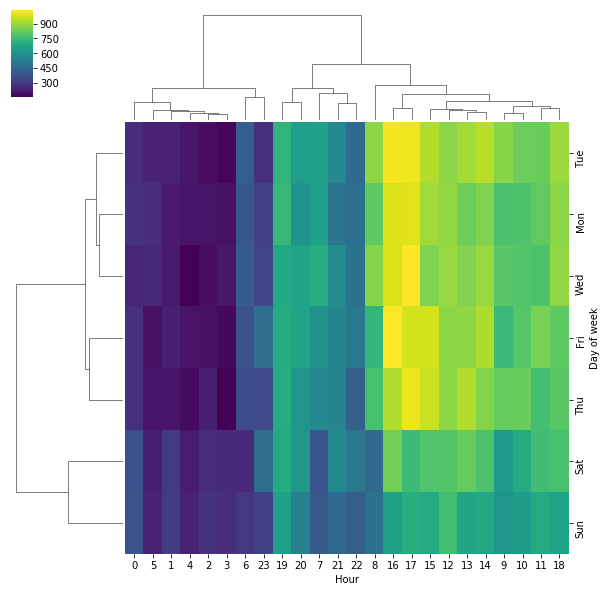

In [37]:
plt.figure(figsize=(14,7))
sns.clustermap(dayHour,cmap='viridis')

In [38]:
monthDay = df.groupby(['Day of week','Month']).count()['Reason'].unstack()
monthDay

Month,1,2,3,4,5,6,7,8,12
Day of week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


# And the same thing we can do in specific day of a week in specific month 

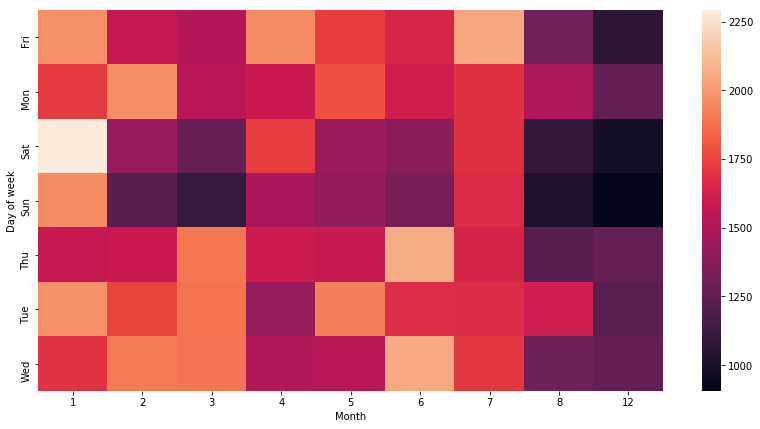

In [39]:
plt.figure(figsize=(14,7))
sns.heatmap(monthDay)

<Figure size 1008x504 with 0 Axes>

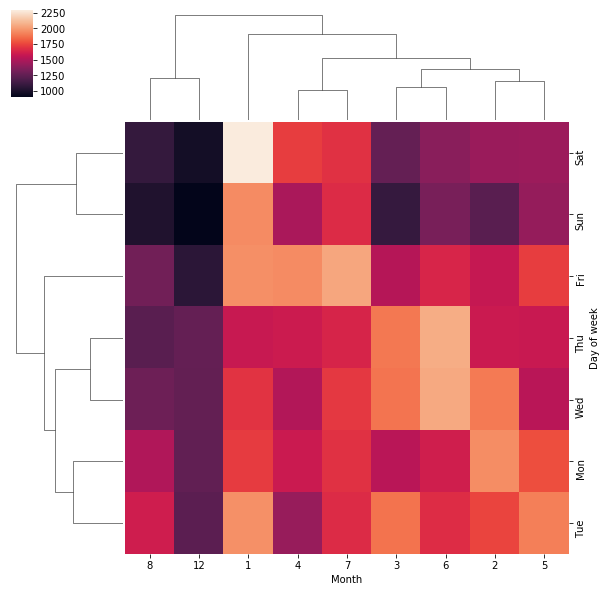

In [40]:
plt.figure(figsize=(14,7))
sns.clustermap(monthDay)